In [11]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import caffe
caffe_root = './' 

In [12]:
MODEL_FILE = caffe_root+'placesCNN/places205CNN_deploy.prototxt'
PRETRAINED = caffe_root+'placesCNN/places205CNN_iter_300000.caffemodel'
MEAN_FILE = caffe_root+'placesCNN/places205CNN_mean.binaryproto'
'''MODEL_FILE = caffe_root+'googlenet_placesCNN/places205CNN_deploy.prototxt'
PRETRAINED = caffe_root+'googlenet_placesCNN/googlelet_places205_train_iter_2400000.caffemodel'
MEAN_FILE = caffe_root+'googlenet_placesCNN/places205CNN_mean.binaryproto'''

In [26]:
imagenet_label_file = caffe_root+'placesCNN/categoryIndex_places205.csv'
labels = list(np.loadtxt(imagenet_label_file, str, delimiter='\,'))
assert len(labels) == 205
print( 'Loaded places205 labels:\n', '\n'.join(labels[:10] + ['...']))'
'''imagenet_label_file = caffe_root+'googlenet_placesCNN/categoryIndex_places205.csv'
labels = list(np.loadtxt(imagenet_label_file, str, delimiter='\,'))
assert len(labels) == 205
print( 'Loaded places205 labels:\n', '\n'.join(labels[:10] + ['...']))''''

"imagenet_label_file = caffe_root+'placesCNN/categoryIndex_places205.csv'\nlabels = list(np.loadtxt(imagenet_label_file, str, delimiter='\\,'))\nassert len(labels) == 205\nprint( 'Loaded places205 labels:\n', '\n'.join(labels[:10] + ['...']))"

In [14]:
proto_data = open(MEAN_FILE, 'rb').read()
a = caffe.io.caffe_pb2.BlobProto.FromString(proto_data)
mean  = caffe.io.blobproto_to_array(a)[0]

In [15]:
caffe.set_mode_cpu()

In [16]:
net = caffe.Classifier(MODEL_FILE, PRETRAINED,
                       mean=mean,
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))
print ("successfully loaded classifier")

successfully loaded classifier


/d/dam 63
/a/aqueduct 6
/v/viaduct 196
/r/river 156
/b/bridge 31


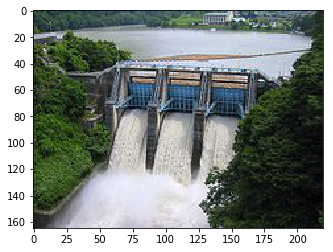

In [21]:
# transform it and copy it into the net
#input_image = caffe.io.load_image('image.jpg')
input_image = caffe.io.load_image(caffe_root+'data/dam.jpg')
# test on a image
# predict takes any number of images and formats them for the Caffe net automatically
pred = net.predict([input_image])
net.forward()
output_prob = net.blobs['prob'].data[0]
top_inds = output_prob.argsort()[::-1][:5]

for i in top_inds: print (labels[i])
plt.imshow(input_image)


In [22]:
output_prob[top_inds],top_inds
for i in top_inds: print (labels[i])

/d/dam 63
/a/aqueduct 6
/v/viaduct 196
/r/river 156
/b/bridge 31


In [23]:
len(pred[0]),pred

(205, array([[1.6237422e-06, 1.4027715e-07, 5.4320333e-07, 3.0829742e-06,
         1.5705678e-04, 4.3988553e-07, 2.5451537e-03, 9.5107833e-05,
         7.2704871e-08, 4.7015568e-08, 2.1778843e-07, 6.6255836e-08,
         1.4242359e-07, 5.0368453e-07, 5.9438812e-06, 3.1068634e-08,
         9.4753671e-07, 2.7895831e-08, 4.7075677e-08, 1.4799573e-07,
         2.1369233e-07, 2.9483303e-07, 2.6451782e-04, 3.6854754e-08,
         1.0617915e-07, 9.2935676e-05, 4.9530259e-05, 7.3415819e-08,
         4.0778309e-06, 9.1236222e-07, 6.8232076e-08, 2.1574122e-03,
         6.7448070e-07, 3.7831654e-07, 3.3878198e-08, 1.1695618e-06,
         3.4954351e-08, 5.3596175e-08, 2.3010145e-06, 2.3224796e-08,
         5.8166283e-05, 3.7603616e-06, 2.2506465e-06, 3.6810256e-06,
         8.2144822e-08, 2.1807868e-07, 6.6518332e-08, 1.8952311e-05,
         3.7759867e-07, 9.0576549e-08, 1.3885929e-08, 5.5537878e-08,
         1.1350715e-05, 1.3823015e-07, 4.0573212e-07, 5.3705014e-07,
         2.0342964e-07, 9.121

In [25]:
top_inds,output_prob[top_inds]

(array([ 63,   6, 196, 156,  31]),
 array([0.98370427, 0.00374703, 0.00321986, 0.00301002, 0.00248566],
       dtype=float32))